## Configurations

In [1]:
run_name = "current/httperf_unbalance_wlc_to1_fdb"

In [2]:
import os
import glob
from functools import reduce

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

# display plots in the notebook
%matplotlib inline

# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

## Client-side stats

In [4]:
# read in the data
plot_data_list = []

for i in glob.glob("./results/" + run_name + "/httperf_client_*.csv"):
    plot_data_list.append(pd.read_csv(i, header=0, na_filter=False))

In [5]:
plot_data = pd.DataFrame()

for i in ['Rate', 'Request rate', 'Number of requests',
          'Response status 1xx', 'Response status 2xx', 'Response status 3xx', 
          'Response status 4xx', 'Response status 5xx']:
    plot_data[i] = reduce(lambda x, y: x + y, [plot_data_list[j][i] for j in range(len(plot_data_list))])

plot_data['Response time'] = reduce(lambda x, y: x + y, [plot_data_list[j]['Response time'] 
                                                         for j in range(len(plot_data_list))]) / len(plot_data_list)

plot_data.head()

,Rate,Request rate,Number of requests,Response status 1xx,Response status 2xx,Response status 3xx,Response status 4xx,Response status 5xx,Response time
0,320,320.0,31999,0,31979,0,0,0,9.39375
1,640,635.6,31950,0,31084,0,0,0,81.26250
2,960,946.9,31553,0,29668,0,0,0,29.86875
3,1280,1265.3,31656,0,30595,0,0,0,12.66875
4,1600,1600.0,32000,0,31931,0,0,0,9.45000


### 1. Request rate

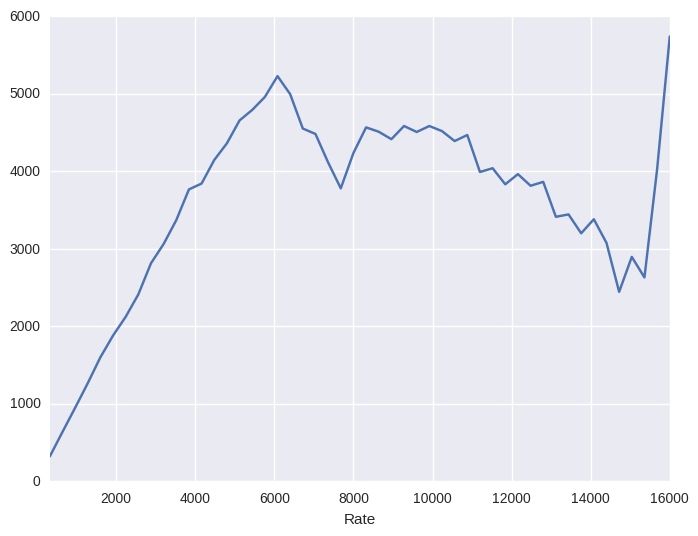

In [6]:
plot_data.plot('Rate', 'Request rate', ylim=(0, None))

In [7]:
plot_data['Rate'].describe()

count       50.000000
mean      8160.000000
std       4664.761516
min        320.000000
25%       4240.000000
50%       8160.000000
75%      12080.000000
max      16000.000000
dtype: float64

In [8]:
plot_data['Request rate'].describe()

count      50.000000
mean     3613.050000
std      1212.235215
min       320.000000
25%      3066.150000
50%      3913.950000
75%      4501.500000
max      5738.800000
dtype: float64

### 2. Response time

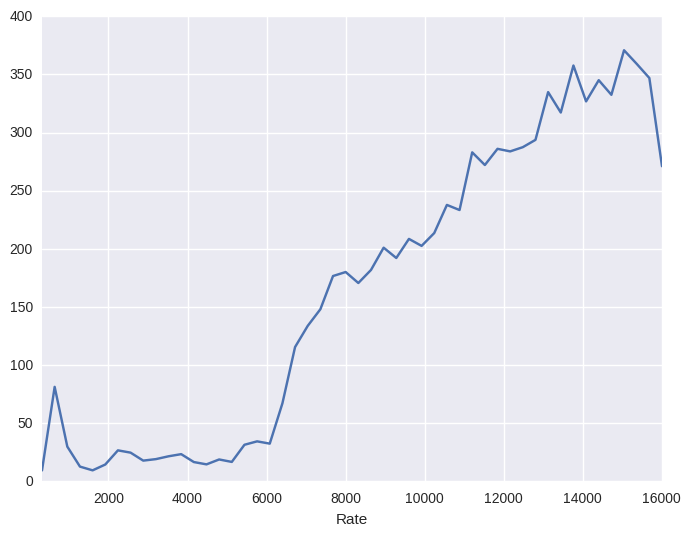

In [9]:
plot_data.plot('Rate', 'Response time', ylim=(0, None))

In [10]:
plot_data['Response time'].describe()

count     50.000000
mean     163.717000
std      127.771199
min        9.393750
25%       25.173437
50%      178.331250
75%      283.610937
max      370.818750
dtype: float64

### 3. Success rate

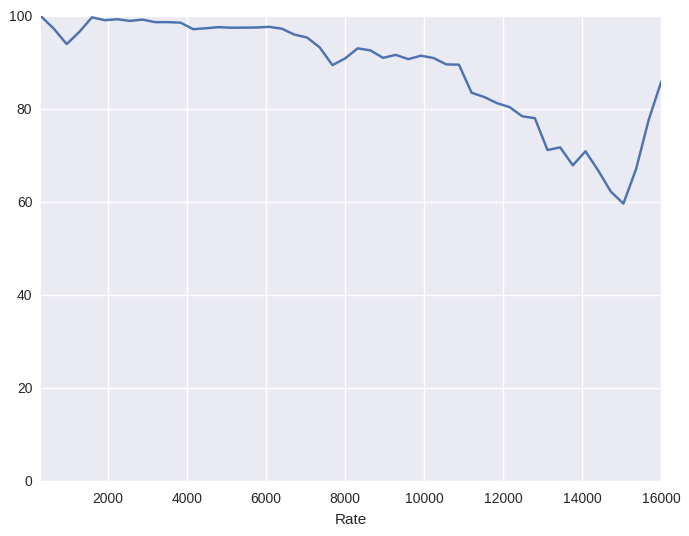

In [11]:
plot_data['Success rate'] = (plot_data['Response status 2xx'] + plot_data['Response status 3xx']) / plot_data['Number of requests'] * 100.0
plot_data.plot('Rate', 'Success rate', ylim=(0, None))

In [12]:
plot_data['Success rate'].describe()

count    50.000000
mean     88.676641
std      11.349947
min      59.728011
25%      81.665944
50%      92.197078
75%      97.561505
max      99.937498
dtype: float64

## Server-side stats

In [13]:
# read in the stats data
stats_data = pd.read_csv("./results/" + run_name + "/httperf_server_stats.csv", header=0, na_filter=False)
stats_data['Connections Ratio (%)'] = stats_data['Connections'] / sum(stats_data['Connections']) * 100
stats_data['Packets Ratio (%)'] = stats_data['Packets'] / sum(stats_data['Packets']) * 100
stats_data['Bytes Ratio (%)'] = stats_data['Bytes (K)'] / sum(stats_data['Bytes (K)']) * 100
stats_data

,Server,Connections,Packets,Bytes (K),Connections Ratio (%),Packets Ratio (%),Bytes Ratio (%)
0,11.11.11.107:80,6795,389333,25571,11.255031,5.940482,5.837435
1,11.11.11.106:80,17757,2043429,136547,29.412154,31.178844,31.171413
2,11.11.11.103:80,18082,2067094,138337,29.950475,31.539927,31.580041
3,11.11.11.102:80,17739,2054040,137597,29.382340,31.340748,31.411111
